In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

#이후 런타임 다시 시작

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (40.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and di

In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
pd.set_option("display.max_row", 100)
pd.set_option("display.max_column", 100)

In [ ]:
import warnings   
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams["font.size"] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
cd /content/drive/MyDrive/UBION_final_project/data

/content/drive/MyDrive/UBION_final_project/data


In [ ]:
code = pd.read_csv("code.csv", encoding='cp949')
EAO = pd.read_csv("EAO.csv", encoding='cp949') # External Audit Opinion(감사의견)
credit = pd.read_csv("credit.csv", encoding='cp949')
business = pd.read_csv('business.csv', encoding='cp949')

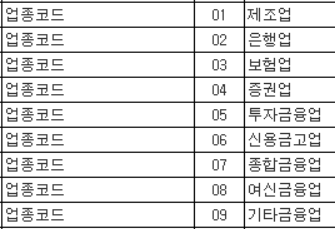

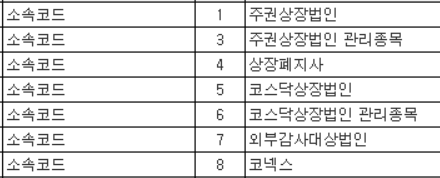

In [ ]:
print(len(code['회사명'].unique()))
print(len(code[code['업종코드']==1.0]['회사명'].unique()))

3241
2970


In [ ]:
target_code = code[code['업종코드']==1.0]

In [ ]:
target_code['업종코드'] = target_code['업종코드'].astype(int)
target_code['소속코드'] = target_code['소속코드'].astype(int)
target_code['산업코드'] = target_code['산업코드'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
target_code['업종코드'] = target_code['업종코드'].astype(str).str.zfill(2)
target_code['소속코드'] = target_code['소속코드'].astype(str).str.zfill(2)
target_code['산업코드'] = target_code['산업코드'].astype(str).str.zfill(6)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
target_code['산업대분류'] = target_code['산업코드'].str[0:2]
target_code

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,회사명,거래소코드,회계년도,업종코드,소속코드,산업코드,산업대분류
10,(주)CMG제약,58820,2000/12,01,05,032102,03
11,(주)CMG제약,58820,2001/12,01,05,032102,03
12,(주)CMG제약,58820,2002/12,01,05,032102,03
13,(주)CMG제약,58820,2003/12,01,05,032102,03
14,(주)CMG제약,58820,2004/12,01,05,032102,03
...,...,...,...,...,...,...,...
45295,흥아해운(주),3280,2005/12,01,01,085001,08
45296,흥아해운(주),3280,2000/12,01,01,085001,08
45297,흥아해운(주),3280,2003/12,01,01,085001,08
45298,흥아해운(주),3280,2002/12,01,01,085001,08


In [ ]:
merged_df = pd.merge(target_code , credit, how = 'left', on=['회사명', '거래소코드','회계년도'])
merged_df

,회사명,거래소코드,회계년도,업종코드,소속코드,산업코드,산업대분류,산업명,상장폐지일,신용등급
0,(주)CMG제약,58820,2000/12,01,05,032102,03,의료용 물질 및 의약품 제조업,NaN,NaN
1,(주)CMG제약,58820,2001/12,01,05,032102,03,의료용 물질 및 의약품 제조업,NaN,NaN
2,(주)CMG제약,58820,2002/12,01,05,032102,03,의료용 물질 및 의약품 제조업,NaN,NaN
3,(주)CMG제약,58820,2003/12,01,05,032102,03,의료용 물질 및 의약품 제조업,NaN,NaN
4,(주)CMG제약,58820,2004/12,01,05,032102,03,의료용 물질 및 의약품 제조업,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
146058,흥아해운(주),3280,2005/12,01,01,085001,08,수상 운송업,NaN,NaN
146059,흥아해운(주),3280,2000/12,01,01,085001,08,수상 운송업,NaN,NaN
146060,흥아해운(주),3280,2003/12,01,01,085001,08,수상 운송업,NaN,NaN
146061,흥아해운(주),3280,2002/12,01,01,085001,08,수상 운송업,NaN,NaN


In [ ]:
merged_df = pd.merge(merged_df, EAO, how='left', on = ['회사명', '거래소코드','회계년도'])
merged_df

,회사명,거래소코드,회계년도,업종코드,소속코드,산업코드,산업대분류,산업명,상장폐지일,신용등급,감사의견코드,감사의견
0,(주)CMG제약,58820,2000/12,01,05,032102,03,의료용 물질 및 의약품 제조업,NaN,NaN,UQ,NaN
1,(주)CMG제약,58820,2001/12,01,05,032102,03,의료용 물질 및 의약품 제조업,NaN,NaN,UQ,NaN
2,(주)CMG제약,58820,2002/12,01,05,032102,03,의료용 물질 및 의약품 제조업,NaN,NaN,UQ,NaN
3,(주)CMG제약,58820,2003/12,01,05,032102,03,의료용 물질 및 의약품 제조업,NaN,NaN,UQ,NaN
4,(주)CMG제약,58820,2004/12,01,05,032102,03,의료용 물질 및 의약품 제조업,NaN,NaN,UQ,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
148761,흥아해운(주),3280,2005/12,01,01,085001,08,수상 운송업,NaN,NaN,UQ,NaN
148762,흥아해운(주),3280,2000/12,01,01,085001,08,수상 운송업,NaN,NaN,QG,"환율조경차가 31,046,255천원 과대계상되어 전기이월이익 잉여금 31,046,2..."
148763,흥아해운(주),3280,2003/12,01,01,085001,08,수상 운송업,NaN,NaN,UQ,NaN
148764,흥아해운(주),3280,2002/12,01,01,085001,08,수상 운송업,NaN,NaN,UQ,NaN


In [ ]:
merged_df['회계년도'].unique()

array(['2000/12', '2001/12', '2002/12', '2003/12', '2004/12', '2005/12',
       '2006/12', '2007/12', '2008/12', '2009/12', '2010/12', '2011/12',
       '2012/12', '2013/12', '2014/12', '2015/12', '2016/12', '2017/12',
       '2018/12', '2019/12', '2020/12', '2001/06', '2002/06', '2003/06',
       '2004/06', '2000/06', '2005/06', '2000/11', '2001/11', '2002/11',
       '2003/11', '2004/11', '2005/11', '2006/11', '2007/11', '2008/11',
       '2009/11', '2010/11', '2011/11', '2002/09', '2000/09', '2001/09',
       '2003/09', '2004/09', '2005/09', '2006/09', '2007/09', '2008/09',
       '2009/09', '2010/09', '2011/09', '2012/09', '2013/09', '2014/09',
       '2015/09', '2016/09', '2017/09', '2018/09', '2019/09', '2020/09',
       '2006/06', '2007/06', '2009/03', '2010/03', '2011/03', '2000/03',
       '2001/03', '2002/03', '2003/03', '2004/03', '2005/03', '2006/03',
       '2007/03', '2008/03', '2012/03', '2013/03', '2014/03', '2015/03',
       '2016/03', '2017/03', '2000/08', '2001/08', 

In [ ]:
merged_df = merged_df[~merged_df['회계년도'].isin(['2021/03','2021/08','2021/06','2021/02'])]
merged_df

,회사명,거래소코드,회계년도,업종코드,소속코드,산업코드,산업대분류,산업명,상장폐지일,신용등급,감사의견코드,감사의견
0,(주)CMG제약,58820,2000/12,01,05,032102,03,의료용 물질 및 의약품 제조업,NaN,NaN,UQ,NaN
1,(주)CMG제약,58820,2001/12,01,05,032102,03,의료용 물질 및 의약품 제조업,NaN,NaN,UQ,NaN
2,(주)CMG제약,58820,2002/12,01,05,032102,03,의료용 물질 및 의약품 제조업,NaN,NaN,UQ,NaN
3,(주)CMG제약,58820,2003/12,01,05,032102,03,의료용 물질 및 의약품 제조업,NaN,NaN,UQ,NaN
4,(주)CMG제약,58820,2004/12,01,05,032102,03,의료용 물질 및 의약품 제조업,NaN,NaN,UQ,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
148761,흥아해운(주),3280,2005/12,01,01,085001,08,수상 운송업,NaN,NaN,UQ,NaN
148762,흥아해운(주),3280,2000/12,01,01,085001,08,수상 운송업,NaN,NaN,QG,"환율조경차가 31,046,255천원 과대계상되어 전기이월이익 잉여금 31,046,2..."
148763,흥아해운(주),3280,2003/12,01,01,085001,08,수상 운송업,NaN,NaN,UQ,NaN
148764,흥아해운(주),3280,2002/12,01,01,085001,08,수상 운송업,NaN,NaN,UQ,NaN


In [ ]:
merged_df

,회사명,거래소코드,회계년도,업종코드,소속코드,산업코드,산업대분류,산업명,상장폐지일,신용등급,감사의견코드,감사의견
0,(주)CMG제약,58820,2000/12,01,05,032102,03,의료용 물질 및 의약품 제조업,NaN,NaN,UQ,NaN
1,(주)CMG제약,58820,2001/12,01,05,032102,03,의료용 물질 및 의약품 제조업,NaN,NaN,UQ,NaN
2,(주)CMG제약,58820,2002/12,01,05,032102,03,의료용 물질 및 의약품 제조업,NaN,NaN,UQ,NaN
3,(주)CMG제약,58820,2003/12,01,05,032102,03,의료용 물질 및 의약품 제조업,NaN,NaN,UQ,NaN
4,(주)CMG제약,58820,2004/12,01,05,032102,03,의료용 물질 및 의약품 제조업,NaN,NaN,UQ,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
148761,흥아해운(주),3280,2005/12,01,01,085001,08,수상 운송업,NaN,NaN,UQ,NaN
148762,흥아해운(주),3280,2000/12,01,01,085001,08,수상 운송업,NaN,NaN,QG,"환율조경차가 31,046,255천원 과대계상되어 전기이월이익 잉여금 31,046,2..."
148763,흥아해운(주),3280,2003/12,01,01,085001,08,수상 운송업,NaN,NaN,UQ,NaN
148764,흥아해운(주),3280,2002/12,01,01,085001,08,수상 운송업,NaN,NaN,UQ,NaN


In [ ]:
print( len(merged_df['회사명'].unique()) , len(merged_df[merged_df['감사의견코드']=='DS']['회사명'].unique()))

2970 127


In [ ]:
bankruptcy = merged_df[merged_df['감사의견코드']=='DS']
bankruptcy.to_csv("bankruptcy.csv", index=False)

In [ ]:
EAO_count = bankruptcy.groupby(['회사명'])['감사의견코드'].count().reset_index()
EAO_count[EAO_count['감사의견코드']!=1]

,회사명,감사의견코드
12,(주)드림티엔터테인먼트,2
16,(주)비앤비성원,5
17,(주)비에이치케이,2
18,(주)삼애인더스,2
34,(주)아이티엑스에이아이,3
35,(주)아이팩토리,7
37,(주)야호커뮤니케이션,2
38,(주)에스에프씨,8
43,(주)에프티이앤이,34
49,(주)와이투솔루션,10


In [ ]:
bankruptcy[bankruptcy['회사명'] == 'STX조선해양(주)'].head(100)

,회사명,거래소코드,회계년도,업종코드,소속코드,산업코드,산업대분류,산업명,상장폐지일,신용등급,감사의견코드,감사의견
74143,STX조선해양(주),67250,2013/12,01,04,033101,03,기타 운송장비 제조업,2014/04/15,B-,DS,당기 재무제표를 감사하는 과정에서 당기 및 전기 이전 재무제표에 중요한 영향을 미치...
74144,STX조선해양(주),67250,2013/12,01,04,033101,03,기타 운송장비 제조업,2014/04/15,B+,DS,당기 재무제표를 감사하는 과정에서 당기 및 전기 이전 재무제표에 중요한 영향을 미치...
74145,STX조선해양(주),67250,2013/12,01,04,033101,03,기타 운송장비 제조업,2014/04/15,A-,DS,당기 재무제표를 감사하는 과정에서 당기 및 전기 이전 재무제표에 중요한 영향을 미치...
74146,STX조선해양(주),67250,2013/12,01,04,033101,03,기타 운송장비 제조업,2014/04/15,B-,DS,당기 재무제표를 감사하는 과정에서 당기 및 전기 이전 재무제표에 중요한 영향을 미치...
74147,STX조선해양(주),67250,2013/12,01,04,033101,03,기타 운송장비 제조업,2014/04/15,B-,DS,당기 재무제표를 감사하는 과정에서 당기 및 전기 이전 재무제표에 중요한 영향을 미치...
74148,STX조선해양(주),67250,2013/12,01,04,033101,03,기타 운송장비 제조업,2014/04/15,A3-,DS,당기 재무제표를 감사하는 과정에서 당기 및 전기 이전 재무제표에 중요한 영향을 미치...
74149,STX조선해양(주),67250,2013/12,01,04,033101,03,기타 운송장비 제조업,2014/04/15,A3+,DS,당기 재무제표를 감사하는 과정에서 당기 및 전기 이전 재무제표에 중요한 영향을 미치...
74150,STX조선해양(주),67250,2013/12,01,04,033101,03,기타 운송장비 제조업,2014/04/15,BB+,DS,당기 재무제표를 감사하는 과정에서 당기 및 전기 이전 재무제표에 중요한 영향을 미치...
74151,STX조선해양(주),67250,2013/12,01,04,033101,03,기타 운송장비 제조업,2014/04/15,BB+,DS,당기 재무제표를 감사하는 과정에서 당기 및 전기 이전 재무제표에 중요한 영향을 미치...
74152,STX조선해양(주),67250,2013/12,01,04,033101,03,기타 운송장비 제조업,2014/04/15,BB+,DS,당기 재무제표를 감사하는 과정에서 당기 및 전기 이전 재무제표에 중요한 영향을 미치...


,산업대분류,count
0,01,1
1,03,72
2,06,2
3,07,15
4,10,27
5,13,3
6,14,4
7,16,2
8,18,1


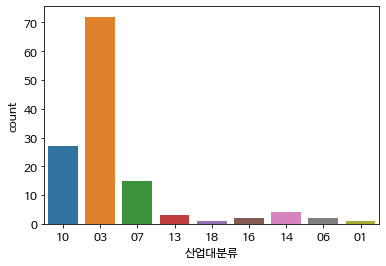

In [ ]:
import seaborn as sns

tmp = bankruptcy.drop_duplicates(['회사명','산업대분류'], keep='first')

sns.countplot(x="산업대분류", data=tmp)

group_by_tmp = tmp.groupby(['산업대분류'])['회사명'].count().reset_index()
group_by_tmp.rename(columns={'회사명':'count'}, inplace=True)
group_by_tmp